<a href="https://colab.research.google.com/github/entangelk/study_data_analytics/blob/main/docs/quests/CDAs/CDA_mixed_unVar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글 폰트 설치 및 시각화

In [1]:
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf
# 설치 후 colab의 경우 런타임메뉴에서 리스타트 세션 해줘야함

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 32 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

- 한글 폰트 설치가 끝났으면 리스타트 잊지말라구!

In [1]:
import matplotlib as mpl
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd

In [4]:
# 유니코드 마이너스 사용 설정
plt.rcParams['axes.unicode_minus'] = False

In [5]:
import scipy.stats as stats
import numpy as np

## load dataset

In [8]:
df_fruit = pd.read_csv('fruitstore_saleshistory.csv')
df_fruit

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403,매장C,NaN,10:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705566,2018-06-30,토,6,26,146297344,정상회원,수산,건어물,멸치류,국물멸치(300g),1.0,수지구,성복동,여,51.0,50대,9189,매장A,NaN,17:56
705567,2018-06-30,토,6,26,1532985472,정상회원,수산,해조,미역/다시마,자른다시마(100g),1.0,수지구,동천동,여,63.0,60대,5169,매장A,NaN,14:37
705568,2018-06-30,토,6,26,1532985472,정상회원,반찬,두부/유부,두부,두부(1모:420g),2.0,수지구,동천동,여,63.0,60대,7466,매장A,NaN,14:37
705569,2018-06-30,토,6,26,1209779776,정상회원,간식,과자,스낵,하늘바다새우(60g),1.0,수지구,동천동,여,41.0,40대,3542,매장A,NaN,18:04


## 이상치, 결측치 확인

In [9]:
df_fruit.isna().sum()

공급일자             0
요일               0
공급월              0
공급주차             0
회원번호             0
조합원상태            0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
주소-구             0
주소-동             0
성별               5
연령              33
연령대             33
구매금액             0
구매매장             0
반품_원거래일자    694337
구매시각             0
dtype: int64

- 반품_원거래일자의 결측치는 반품을 했는지 안했는지에 따라 구분
- 결측치가 아닌 부분이 반품이므로 해당 데이터는 drop하여 계산

In [10]:
df_fruit = df_fruit.query('반품_원거래일자.isna() & 성별.notna() & 연령.notna() & 연령대.notna() & 구매금액.notna() & 구매매장.notna() & 구매시각.notna()')
df_fruit.isna().sum()

공급일자             0
요일               0
공급월              0
공급주차             0
회원번호             0
조합원상태            0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
주소-구             0
주소-동             0
성별               0
연령               0
연령대              0
구매금액             0
구매매장             0
반품_원거래일자    694299
구매시각             0
dtype: int64

In [11]:
df_fruit = df_fruit.query('구매금액 > 0')

In [12]:
df_fruit

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
1,2018-01-02,화,1,1,1506656256,정상회원,채소,버섯,느타리버섯,느타리버섯(300g),1.0,수지구,풍덕천동,여,36.0,30대이하,4977,매장C,NaN,10:05
2,2018-01-02,화,1,1,1506656256,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,수지구,풍덕천동,여,36.0,30대이하,7083,매장C,NaN,10:05
3,2018-01-02,화,1,1,1023108864,정상회원,반찬,두부/유부,두부,연두부(100g),1.0,수지구,풍덕천동,여,36.0,30대이하,766,매장C,NaN,10:08
4,2018-01-02,화,1,1,1476143616,정상회원,간식,빵,"식빵, 식사대용",아침빵(240g/8개)/매장,1.0,수지구,풍덕천동,여,34.0,30대이하,4403,매장C,NaN,10:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705566,2018-06-30,토,6,26,146297344,정상회원,수산,건어물,멸치류,국물멸치(300g),1.0,수지구,성복동,여,51.0,50대,9189,매장A,NaN,17:56
705567,2018-06-30,토,6,26,1532985472,정상회원,수산,해조,미역/다시마,자른다시마(100g),1.0,수지구,동천동,여,63.0,60대,5169,매장A,NaN,14:37
705568,2018-06-30,토,6,26,1532985472,정상회원,반찬,두부/유부,두부,두부(1모:420g),2.0,수지구,동천동,여,63.0,60대,7466,매장A,NaN,14:37
705569,2018-06-30,토,6,26,1209779776,정상회원,간식,과자,스낵,하늘바다새우(60g),1.0,수지구,동천동,여,41.0,40대,3542,매장A,NaN,18:04


## 범주형 / 연속형 : 범주형 따른 관계 확인

### 가설 : 성별 (항목 2 - 남,여), 과일의 가격 분포
 - 분석 내용 : 성별(범주형)에 따라 구매한 과일가격(연속형) 분산이 같은지 확인
  + 귀무 가설 : 성별과 과일가격의 차이가 없다 = 서로 동일하게 움직인다 = 정규분포를 따른다
  + 대립 가설 : 성별과 과일가격의 차이가 있다 = 서로 동일하지 않게 움직인다 = 정규분포를 따르지 않는다

In [13]:
df_fruit_fruit = df_fruit.query('물품중분류 == "과일"')
df_fruit_fruit

,공급일자,요일,공급월,공급주차,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,주소-구,주소-동,성별,연령,연령대,구매금액,구매매장,반품_원거래일자,구매시각
0,2018-01-02,화,1,1,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,수지구,풍덕천동,여,45.0,40대,22207,매장C,NaN,10:04
62,2018-01-02,화,1,1,445131904,정상회원,과실,과일,건대추,건대추(500g),1.0,수지구,풍덕천동,여,58.0,50대,22973,매장C,NaN,12:18
132,2018-01-02,화,1,1,744508416,정상회원,과실,과일,귤(조생),귤/유(1.5kg),1.0,기흥구,보정동,여,63.0,60대,11104,매장C,NaN,14:58
187,2018-01-02,화,1,1,281649856,정상회원,과실,과일,귤(조생),귤/유(1.5kg),1.0,수지구,풍덕천동,여,41.0,40대,11104,매장C,NaN,16:49
220,2018-01-02,화,1,1,548171456,정상회원,과실,과일,배,배(대:3개),1.0,수지구,풍덕천동,여,52.0,50대,16847,매장C,NaN,18:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
705278,2018-06-30,토,6,26,1576208000,정상회원,과실,과일,블루베리,블루베리(500g),1.0,수지구,신봉동,여,49.0,40대,30248,매장D,NaN,11:16
705354,2018-06-30,토,6,26,1553271552,정상회원,과실,과일,황매실,황매실(남고)/유(5kg),2.0,수지구,신봉동,여,45.0,40대,111036,매장D,NaN,12:49
705429,2018-06-30,토,6,26,606984384,정상회원,과실,과일,산딸기,냉동산딸기(250g),3.0,수지구,풍덕천동,여,51.0,50대,35608,매장B,NaN,19:34
705467,2018-06-30,토,6,26,1145758912,정상회원,과실,과일,사과,사과/(2kg)/소,1.0,수지구,상현동,여,37.0,30대이하,13592,매장B,NaN,18:11


### 상품의 단가에 대한 분산검증

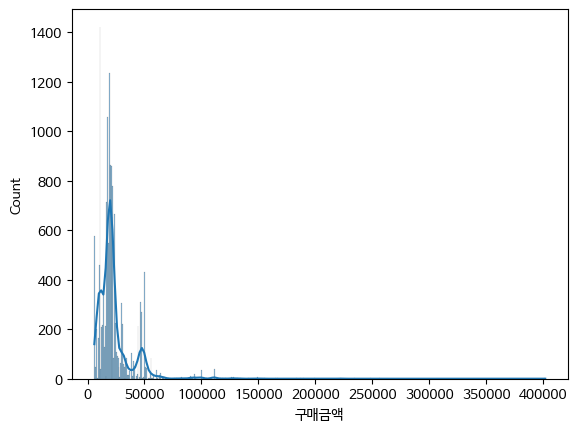

In [14]:
sns.histplot(df_fruit_fruit, x='구매금액', kde=True)
plt.show()

- 데이터의 개수가 15000개 이므로 anderson test 진행

In [16]:
stats.anderson(df_fruit_fruit['구매금액'])

AndersonResult(statistic=1112.1668658840044, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=23033.2944, scale=16229.570848710824)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

- statistic의 값이 critical_values 기준보다 크므로 귀무가설 기각 => 정규분포를 따르지 않는다.
- 범주형의 항목이 2항목(남,여) 이므로 Wilcoxon test 진행

In [17]:
df_fruit_fruit['성별'].unique()

array(['여', '남'], dtype=object)

### Wilcoxon test

In [18]:
stats.ranksums(df_fruit_fruit.query('성별 == "남"')['구매금액'],df_fruit_fruit.query('성별 == "여"')['구매금액'])

RanksumsResult(statistic=-0.7393046577873396, pvalue=0.45972202161574793)

### 분석 결과
- 통계 결론 : 귀무가설 성립 (pvalue > 0.05)
- 사실 결론 : 성별에 따라 구매한 과일의 가격의 차이가 없다. (서로 동일하게 움직인다 => 정규분포로 움직인다)